## <span style = 'color : Olive' > Boom Bikes Case Study Linear Assignment by Merrymel George

### <span style = 'color : Navy' >Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes. 
- How well those variables describe the bike demands 

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### <span style = 'color : Navy' >Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### <span style = 'color : Navy' >Data Dictionary

The data, day.csv, has the following attributes :
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### <span style = 'color : SteelBlue' > Importing the required packages

In [1]:
#Importing the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

### <span style = 'color : SaddleBrown' >Step 1. Data Reading

In [2]:
# Data from the csv file is loaded using pandas and 'bikedata' dataframe is created
bikedata = pd.read_csv('day.csv')

### <span style = 'color : SaddleBrown'>Step 2. Data Understanding

In [3]:
# First 5 rows of the dataframe
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Total number of rows and columns of the dataframe
bikedata.shape

(730, 16)

### <span style = 'color : ForestGreen' >Inference - There are 16 attributes and 730 rows

In [5]:
# Understanding the data types of each attribute
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Though it can deduced from info that there aren't null values, double checking the same
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <span style = 'color : ForestGreen' >Inference - There are no null values in any of the columns for all the rows

In [7]:
# Checking the unique values in each of the attribute to get an idea of columns that may not help in analysis
bikedata.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# Understanding the different stats for the attributes
bikedata.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


### <span style = 'color : ForestGreen' >Inference - No duplicates and few unuseful attributes
 - There are no duplicates in the data as 'instant' and 'dteday' attributes have 730 unqiue values which is same as the the total number of rows. 
 - As 'instant' column is fully unique, it won't add any value to the analysis, and hence can be removed
 - 'dteday' column, in a way, can be fgured out from 'yr', 'month' and 'weekday',and so, it can be removed 

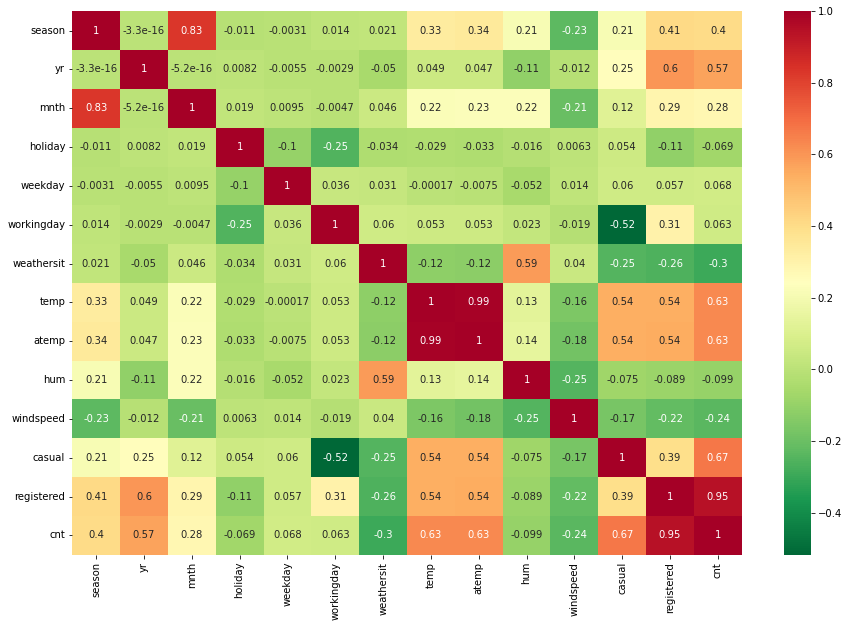

In [9]:
# checking the correlation of different variables with the target variable to find multicollinearity
plt.figure(figsize = (15,10))
sns.heatmap(bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 
                      'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
                       'casual', 'registered', 'cnt']].corr(),annot =True, cmap = 'RdYlGn_r')
plt.show()

### <span style = 'color : ForestGreen' >Inference - 'temp' and 'atemp' have the same correlation value and has a positive correlation with the target 'cnt' variable. Hence, there are chances of multicollinearity

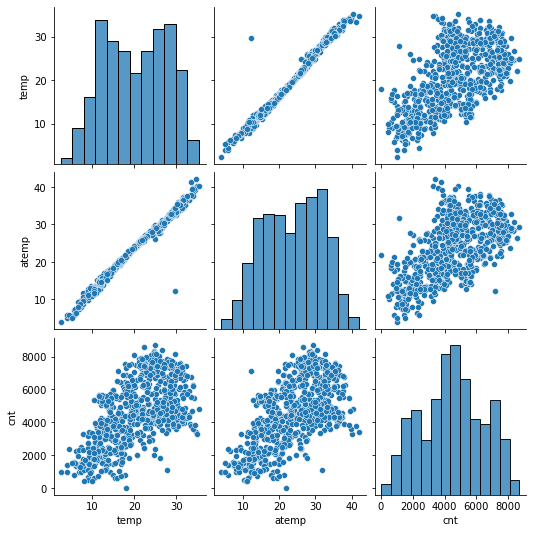

In [10]:
#reconfirming the correlation between 'temp' and 'atemp'
sns.pairplot(bikedata,vars=['temp','atemp', 'cnt'])

### <span style = 'color : ForestGreen' >Inference - 'temp' and 'atemp' shows same relation with target variable, and so, one of them has to removed to avoid multicollinearity

In [11]:
# To confirm the business understanding that the target variable 'cnt' is the sum of 'casual' and 'registered'.
bikedata[bikedata['casual'] + bikedata['registered'] != bikedata['cnt']].count()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <span style = 'color : ForestGreen' >Inference - 'casual' and 'registered' attributes can be dropped as the sum of the attributes is 'cnt' which is our target attribute

### <span style = 'color : DarkSlateBlue' >Tagging the remaining attributes to Categorical and Numerical variable types based on data dictionary/business understanding

### <span style = 'color : SteelBlue' >Categorical Variables 

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - Clear, Few clouds, Partly cloudy, Partly cloudy
    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 
### <span style = 'color : SteelBlue' >Numerical Variables

- temp : temperature in Celsius
- hum: humidity
- windspeed: wind speed
- cnt: count of total rental bikes including both casual and registered

### <span style = 'color : SaddleBrown'>Step 3. Data Cleansing, Data Wrangling and EDA

### <span style = 'color : SaddleBrown'>Step 3a. Data Cleansing

In [12]:
#Creating a new dataframe from the original dataframe without the attributes that were identified 
#as not required in the previous steps
bikedata_new=bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
                      'hum', 'windspeed','cnt']]

In [13]:
bikedata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [14]:
#Mapping the 'mnth' column numbers to corresponding month abbreviations using the calendar package
bikedata_new['mnth'] = bikedata_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [15]:
#Mapping the 'season' column numbers to corresponding season names from the metadata
bikedata_new['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [16]:
#Mapping the 'weathersit' column numbers to corresponding season names from the metadata
bikedata_new['weathersit'].replace({1:'clear',2:'mist',3:'lightsnow',4:'heavyrain'}, inplace=True)

In [17]:
#Mapping the 'weekday' column numbers to corresponding season names from the metadata
bikedata_new['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday", 5:"Friday",
                         6:"Saturday"},inplace=True)

In [18]:
#Renaming the columns for better readability
bikedata_new.rename(columns = {'yr': 'year', 'mnth': 'month', 'weathersit':'weather','hum': 'humidity', 
                               'temp': 'temperature', 'cnt': 'count'}, inplace = True)

In [19]:
bikedata_new.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,count
0,spring,0,Jan,0,Saturday,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


### <span style = 'color : SaddleBrown'>Step 3b. Exploratory Data Analysis

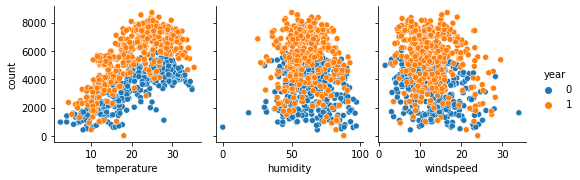

In [20]:
#Plotting the numerical values against 'count' variable
sns.pairplot(bikedata_new, x_vars=['temperature','humidity', 'windspeed'],y_vars=['count'],hue ='year')
plt.show()

### <span style = 'color : ForestGreen' >Inference  
- <span style = 'color : ForestGreen' >'temperature' has a positive correlation with 'count'
- <span style = 'color : ForestGreen' >Generally the 'count' is higher for 2019(1) in comparision with 2018(0)

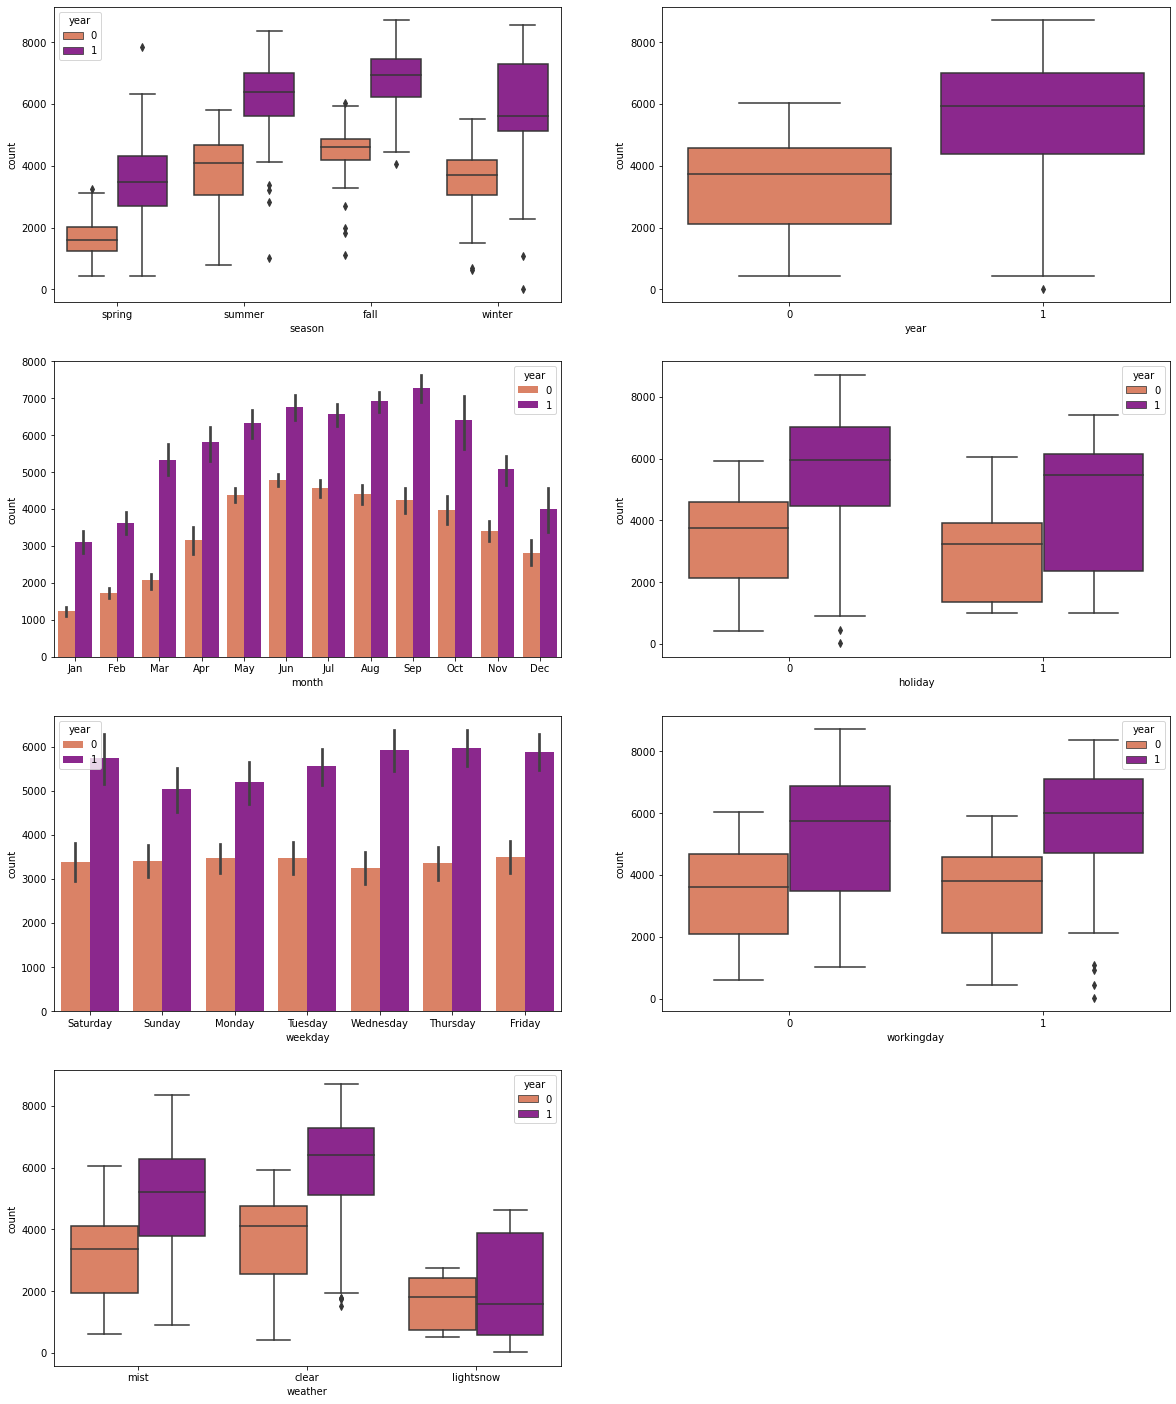

In [21]:
#Plotting the categorical variables against 'count'
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y ='count', hue = 'year', data = bikedata_new, palette='plasma_r')
plt.subplot(4,2,2)
sns.boxplot(x='year', y='count', data=bikedata_new, palette='plasma_r')
plt.subplot(4,2,3)
sns.barplot(x = 'month', y ='count', hue = 'year', data = bikedata_new, palette='plasma_r')
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y ='count', hue = 'year', data = bikedata_new, palette='plasma_r')
plt.subplot(4,2,5)
sns.barplot(x = 'weekday', y ='count', hue = 'year', data = bikedata_new, palette='plasma_r')
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y ='count', hue = 'year', data = bikedata_new, palette='plasma_r')
plt.subplot(4,2,7)
sns.boxplot(x = 'weather', y ='count', hue = 'year', data = bikedata_new, palette='plasma_r')

plt.show()

### <span style = 'color : ForestGreen' >Inference  
- <span style = 'color : ForestGreen' >The 'count' is comparitively higher in 'Fall', during the months of July, August, September
- <span style = 'color : ForestGreen' >Reconfirming what was found earlier, the 'count' is high in 2019(1) compared to 2018(0)
- <span style = 'color : ForestGreen' >Though there isn't much difference in 'count' for 'weekdays', be it a 'wokring day' or no, but 'holidays' tend to have lesser 'count' than non-holidays

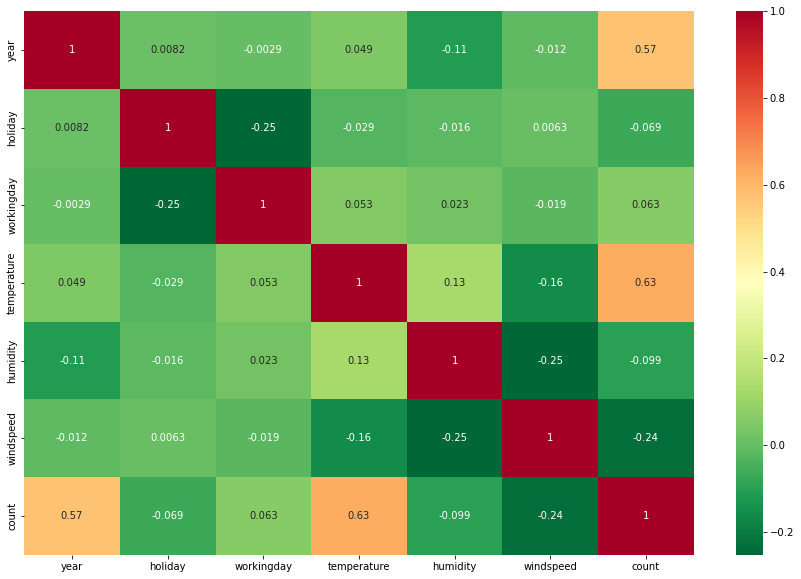

In [22]:
# Plotting the correlation of different variables
plt.figure(figsize = (15,10))
sns.heatmap(bikedata_new.corr(),annot =True, cmap = 'RdYlGn_r')
plt.show()

### <span style = 'color : ForestGreen' >Inference - While 'holiday', 'humidity' and 'windspeed' shows negative correlation to 'count', other variables shows positive correlation, and the chances of multicollinearity is almost zero


### <span style = 'color : SaddleBrown'>Step 3c. Data Wrangling

In [23]:
#Converting the data types of the categorical variables
bikedata_new['season']=bikedata_new['season'].astype('category')
bikedata_new['weather']=bikedata_new['weather'].astype('category')
bikedata_new['month']=bikedata_new['month'].astype('category')
bikedata_new['weekday']=bikedata_new['weekday'].astype('category')
bikedata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       730 non-null    category
 1   year         730 non-null    int64   
 2   month        730 non-null    category
 3   holiday      730 non-null    int64   
 4   weekday      730 non-null    category
 5   workingday   730 non-null    int64   
 6   weather      730 non-null    category
 7   temperature  730 non-null    float64 
 8   humidity     730 non-null    float64 
 9   windspeed    730 non-null    float64 
 10  count        730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [24]:
#Creating dummy variables for 'season' using one hot encoding for better model building
seasons = pd.get_dummies(bikedata_new['season'], drop_first = True)
seasons.sample(10)

,spring,summer,winter
69,1,0,0
373,1,0,0
134,0,1,0
106,0,1,0
498,0,1,0
49,1,0,0
588,0,0,0
372,1,0,0
397,1,0,0
486,0,1,0


#### <span style = 'color : DarkSlateBlue'> As we know, after one hot encoding of nominal variables, we can drop one of the newly created variable as it can be deduced from the other variables. In our case, as shown below:  
*     000 will corresponds to spring
*     100 will corresponds to summer
*     010 will corresponds to fall
*     001 will corresponds to winter

#### <span style = 'color : DarkSlateBlue'>'drop_first = True' will take care of that one unwanted variable

In [25]:
#Adding the newly created one hot encoded variables to the bikedata_new dataframe
bikedata_new = pd.concat((bikedata_new,seasons),axis=1)

#Removing the 'season' column 
bikedata_new = bikedata_new.drop(['season'],axis=1)

In [26]:
#Using the same logic as explained for 'season', creating dummy variables for 'month','weekday','weather' and
#appending them to the bikedata_new, and then removing the 'month','weekday','weather' variables

#month
months = pd.get_dummies(bikedata_new['month'], drop_first = True)
bikedata_new = pd.concat((bikedata_new,months),axis=1)
bikedata_new = bikedata_new.drop(['month'],axis=1)


#weekday
weekdays = pd.get_dummies(bikedata_new['weekday'], drop_first = True)
bikedata_new = pd.concat((bikedata_new,weekdays),axis=1)
bikedata_new = bikedata_new.drop(['weekday'],axis=1)

#weather
weathers = pd.get_dummies(bikedata_new['weather'], drop_first = True)
bikedata_new = pd.concat((bikedata_new,weathers),axis=1)
bikedata_new = bikedata_new.drop(['weather'],axis=1)

#year
# years = pd.get_dummies(bikedata_new['year'], drop_first = True)
# bikedata_new = pd.concat((bikedata_new,years),axis=1)
# bikedata_new = bikedata_new.drop(['year'],axis=1)


bikedata_new.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lightsnow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
bikedata_new.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'lightsnow', 'mist'],
      dtype='object')

#### <span style = 'color : DarkSlateBlue'> As 'year', 'workingday' and 'holiday' variables have binary values, they can be kept as is without the need for any encoding

### <span style = 'color : SaddleBrown'>Step 4. Test-Train Data Split and Feature Scaling

### <span style = 'color : SaddleBrown'>Step 4a. Test-Train Data Split

### <span style = 'color : SteelBlue' > Importing the required packages

In [28]:
# Importing Sklearn library for train_test_split

import sklearn
from sklearn.model_selection import train_test_split

In [29]:
# Splitting the data to train and test set with a ratio of 70 is to 30
np.random.seed(0)
bikedata_train, bikedata_test = train_test_split(bikedata_new, train_size = 0.7, test_size = 0.3, random_state = 100)

print('Train data -',bikedata_train.shape)
print('Test data  -', bikedata_test.shape)

Train data - (510, 29)
Test data  - (219, 29)


In [30]:
bikedata_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lightsnow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <span style = 'color : SaddleBrown'>Step 4b. Feature Scaling

#### <span style = 'color : DarkSlateBlue'>Scaling all the variables to a similar scale makes the model 
- <span style = 'color : DarkSlateBlue'> easily intepretable 
- <span style = 'color : DarkSlateBlue'> helps in the faster convergence of gradient descent methods
- <span style = 'color : DarkSlateBlue'> takes care of the outliers
- <span style = 'color : DarkSlateBlue'> only affects the coefficient values and not the other parameters like R-squared, F-statistic, p-value etc
    
#### <span style = 'color : DarkSlateBlue'>MinMax scaling brings all of the data in the range of 0 and 1. 
<span style = 'color : DarkSlateBlue'> MinMax Scaling: x=x−min(x)/(max(x)−min(x))

#### <span style = 'color : DarkSlateBlue'>Applying MinMax scaling here

### <span style = 'color : SteelBlue' > Importing the required packages

In [31]:
#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
#Variables to be scaled. Though it is not required to scale the target variable 'count' but still scaling the same to
#lower the magnitude of the coefficients as well as for easy model evaluation
scal_var = ['temperature','humidity','windspeed', 'count']

#Instantiating the MinMaxScaler object
scaler = MinMaxScaler()

#Applying Fit_transform on the scal_var
bikedata_train[scal_var] = scaler.fit_transform(bikedata_train[scal_var])

bikedata_train.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lightsnow,mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
#Creating the y variable and X variable from the train data
y_train = bikedata_train.pop('count')
X_train = bikedata_train

### <span style = 'color : SaddleBrown'>Step 5. Model Building and Evaluation

### <span style = 'color : SaddleBrown'>Step 5a. Building a LR Model and applying RFE

#### <span style = 'color : DarkSlateBlue'>Since there are 29 variables, it would be a better approach to use Recursvie Feature Selection to narrow down the number of dependent variables. As such, we will use Linear Regression package to build the model

### <span style = 'color : SteelBlue' > Importing the required packages

In [34]:
# Importing LinearRegression and RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [35]:
#Instantiating the Linear Regression object
lrm = LinearRegression()

#fitting the train data
lrm.fit(X_train, y_train)

LinearRegression()

In [36]:
#Running RFE to get the most dependent 15 variables
rfe = RFE(lrm, 15)            
rfe = rfe.fit(X_train, y_train)

In [37]:
#Variables, whether it's selected by RFE and the corresponding ranking 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('lightsnow', True, 1),
 ('mist', True, 1)]

In [38]:
#15 variables selected by RFE
rfecols = list(X_train.columns[rfe.get_support(1)]) 
print('Top 15 dependent variables for the model chosen by RFE')
list(rfecols)

Top 15 dependent variables for the model chosen by RFE


['year',
 'holiday',
 'workingday',
 'temperature',
 'humidity',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Jan',
 'Jul',
 'Sep',
 'Saturday',
 'lightsnow',
 'mist']

### <span style = 'color : SaddleBrown'>Step 5b. Building models using RFE selected variables with statsmodel

#### <span style = 'color : DarkSlateBlue'>StatsModel provides a detailed summary of all the statistic values which will help in identifying the most dependent features and eliminating the unwanted features

### <span style = 'color : SteelBlue' > Importing the required packages

In [39]:
#Importng statsmodels library 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
#Creating a function to build the model
def ModelBuilder(X,y):
    #Adding the constant term as the sm model by default fits the LR line passing through origin
    X = sm.add_constant(X)
    #Building the linear model
    linmod = sm.OLS(y,X).fit()
    #Printing the summary
    print(linmod.summary())
    return X

#Creating a function to show the VIFs of each variable
def VIFvalues(X):
    X = X.drop(['const'], axis = 1)
    VIF = pd.DataFrame()
    VIF['features'] = X.columns
    VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF['VIF'] = round(VIF['VIF'], 2)
    VIF = VIF.sort_values(by = "VIF", ascending = False)
    return(VIF)

### <span style = 'color : DarkSlateBlue'>Model 1 with 15 variables

In [41]:
X_train_for_model1 = X_train[rfecols]
X_train_model1 = ModelBuilder(X_train_for_model1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.31e-191
Time:                        19:34:56   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2510      0.036      6.949      

In [42]:
#Analysing the VIF values
VIFvalues(X_train_model1)

,features,VIF
4,humidity,29.40
3,temperature,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist,2.29
0,year,2.09
12,Saturday,1.98


### <span style = 'color : ForestGreen' >Inference - 'Jan' has p-value close to 0.05 and so, it has lesser significance. Hence, should be dropped.

### <span style = 'color : DarkSlateBlue'>Model 2 for 14 variables on removing 'Jan'

In [43]:
rfecols.remove('Jan')
X_train_for_model2 = X_train[rfecols]
X_train_model2 = ModelBuilder(X_train_for_model2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.13e-191
Time:                        19:34:56   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2394      0.036      6.696      

In [44]:
#Analysing the VIF values
VIFvalues(X_train_model2)

,features,VIF
4,humidity,28.49
3,temperature,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,mist,2.28
0,year,2.08
11,Saturday,1.97


### <span style = 'color : ForestGreen' >Inference - All the features are significant as they have p-value less than 0.05. But the VIF value of 'humidity' is very high (>10). So, 'humidity' should be dropped.

### <span style = 'color : DarkSlateBlue'>Model 3 for 13 variables on removing 'humidity'

In [45]:
rfecols.remove('humidity')
X_train_for_model3 = X_train[rfecols]
X_train_model3 = ModelBuilder(X_train_for_model3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.73e-189
Time:                        19:34:56   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1577      0.031      5.134      

In [46]:
#Analysing the VIF values
VIFvalues(X_train_model3)

,features,VIF
3,temperature,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,year,2.07
7,winter,1.99
10,Saturday,1.96
8,Jul,1.58
12,mist,1.56


### <span style = 'color : ForestGreen' >Inference - Though a VIF value greater than 5 generally is subjected to scrutiny, as 'temperature' has a very high significance, retaining the feature seems to be the best route

### <span style = 'color : ForestGreen'> Observtions and Conclusion
> ### <span style = 'color : DarkSlateBlue'>  **The prob(F-statistic) is very low confirming that the model is a good fit and the fit is not by chance**

> ### <span style = 'color : DarkSlateBlue'> **Adjusted R2 Score is 83.8%, which is high and good** 

> ### <span style = 'color : DarkSlateBlue'> **All the 13 variables have p-value less than 0.05 and are very significant**

> ### <span style = 'color : DarkSlateBlue'> **Therefore we can safely conclude Model 3 with 13 variables to be a good model, and we can go ahead with it for Model Evaluation and Prediction**

### <span style = 'color : SaddleBrown'>Step 6. Model Evaluation using Residual Analysis

In [47]:
# Calculation of Error in Prediction for Training Data

#Creating the finalized model 
FinalModel = sm.OLS(y_train,X_train_model3).fit()

#Predicting the 'count' variable using the model
y_train_pred = FinalModel.predict(X_train_model3)

#calculating the residual values
res = (y_train - y_train_pred)

### <span style = 'color : DarkSlateBlue'>A built model can be considered as a good one if: 
- #### <span style = 'color : DarkSlateBlue'> The residues are normally distributed around mean equal to 0
- #### <span style = 'color : DarkSlateBlue'> There is no specific pattern between residues and predicted values
- #### <span style = 'color : DarkSlateBlue'> Error terms have constant variance (homoscedasticity)
- #### <span style = 'color : DarkSlateBlue'> Linear relationship between X and y

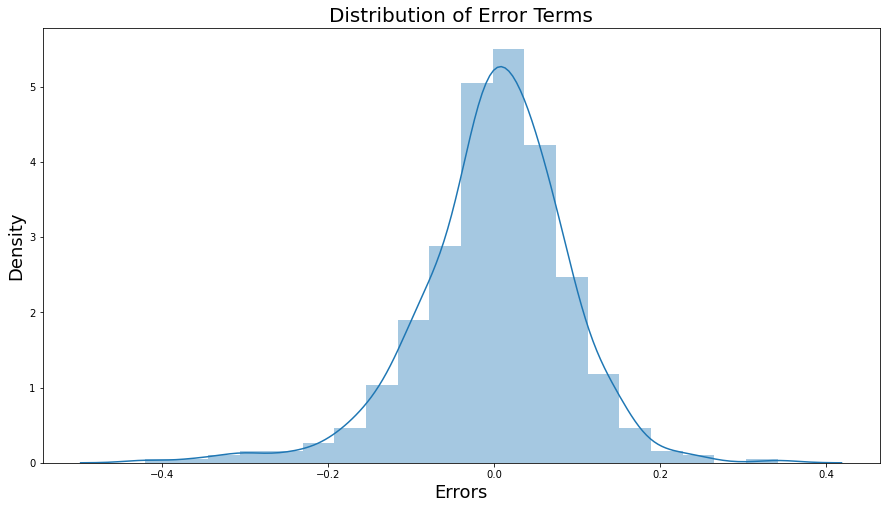

In [48]:
# Plotting the distribution of error terms 
plt.figure(figsize=(15,8))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Distribution of Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.ylabel('Density', fontsize = 18) 
plt.show()

### <span style = 'color : ForestGreen' >Inference - The residues are normally distributed around mean as zero. This confirms that the selected model is a good model

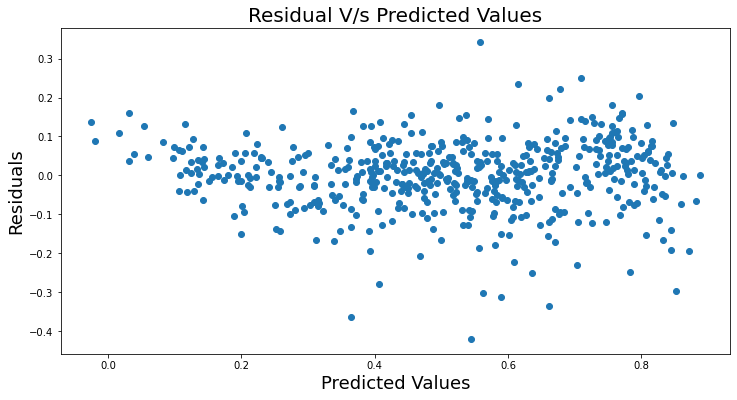

In [49]:
#Plotting the residues against the predicted values
plt.figure(figsize = (12,6))
plt.scatter(y_train_pred,res)
plt.title('Residual V/s Predicted Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.show()

### <span style = 'color : ForestGreen' >Inference - There is no visible specific pattern between residues and predicted values

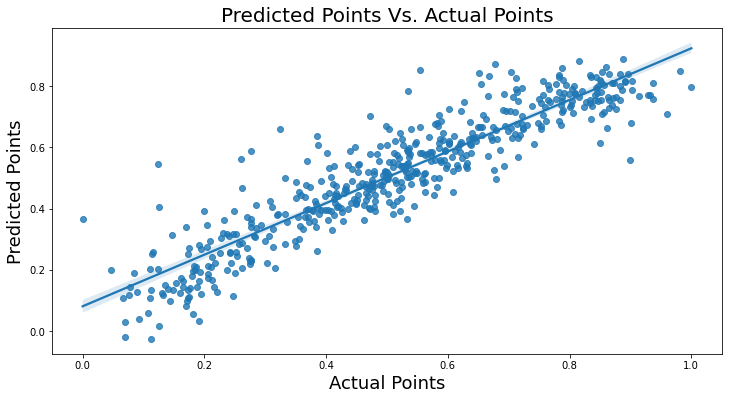

In [50]:
#plotting the predicted values against the actual values
plt.figure(figsize = (12,6))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontsize=20)
plt.xlabel('Actual Points', fontsize=18)
plt.ylabel('Predicted Points', fontsize=18)
plt.show()

### <span style = 'color : ForestGreen' >Inference - The plot clearly shows the homoscedasticity

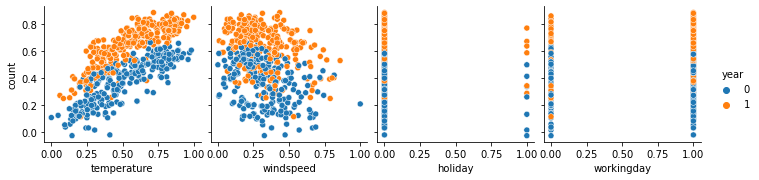

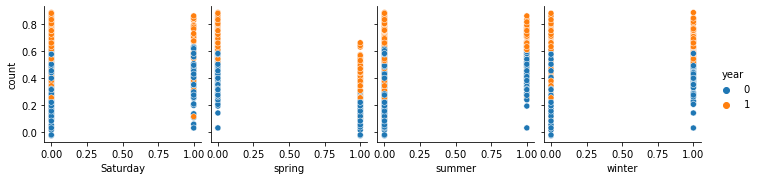

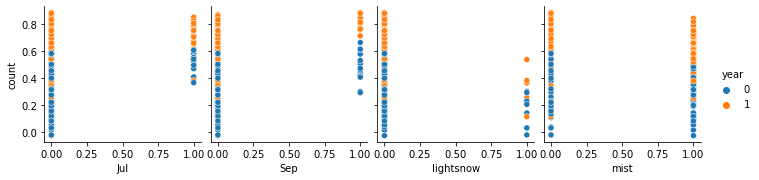

In [51]:
#Plotting the X test variables against predicted y value to check for linear relationship
check = pd.DataFrame(X_train_model3[['year','holiday','workingday','temperature','windspeed','spring','summer','winter','Jul','Sep','Saturday','lightsnow','mist']])
check['count'] = y_train_pred

sns.pairplot(check,x_vars=['temperature','windspeed','holiday','workingday'], y_vars=['count'], hue='year')
sns.pairplot(check,x_vars=['Saturday','spring','summer','winter',], y_vars=['count'], hue='year')
sns.pairplot(check,x_vars=['Jul','Sep','lightsnow','mist'], y_vars=['count'], hue='year')

### <span style = 'color : ForestGreen'> Conclusion
> ### <span style = 'color : DarkSlateBlue'>  **The model evaluation using residual analysis confirms that the selected model is a good model, and can be used for predictions**


### <span style = 'color : SaddleBrown'>Step 7. Model Prediction using test data

In [52]:
#Applying transform on the scal_var for the test data
bikedata_test[scal_var] = scaler.transform(bikedata_test[scal_var])
bikedata_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lightsnow,mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
#Creating the target variable and dependent variables for the test data
y_test = bikedata_test.pop('count')
X_test = bikedata_test[rfecols]

In [54]:
#Adding the constant for the stat model in the test data
X_test_for_FinalModel = sm.add_constant(X_test)

#predicting the target variable
y_test_pred = FinalModel.predict(X_test_for_FinalModel)

In [55]:
#Variables and their corresponding coefficient values
FinalModel.params

const          0.157668
year           0.233626
holiday       -0.057148
workingday     0.046259
temperature    0.492017
windspeed     -0.149124
spring        -0.065288
summer         0.046496
winter         0.085870
Jul           -0.049971
Sep            0.075781
Saturday       0.058008
lightsnow     -0.290444
mist          -0.083515
dtype: float64

### <span style = 'color : SteelBlue' > Importing the required packages

In [56]:
#Importing r2_score
from sklearn.metrics import r2_score 

In [57]:
#Calculating the r2_score for the test data
r2_score_test = round(r2_score(y_test, y_test_pred),3)
r2_score_test

0.808

In [58]:
print("R Squared value of the train data :", 0.842)
print("R Squared value of the test data  :", r2_score_test)

R Squared value of the train data : 0.842
R Squared value of the test data  : 0.808


### <span style = 'color : ForestGreen' >The R Squared value of the test data is 80.8%. Though it is a bit low comparing with the train data's R Squared value, but still, it's a high value

In [59]:
#Calculating the Adjusted R Squared value

#number of rows in the test data
n = X_test.shape[0]

#number of predictors(columns) in the test data
p = X_test.shape[1]

#Calculating Adjusted R Squared values using the formula
adjusted_r2_score_test = round(1-(1-r2_score_test)*(n-1)/(n-p-1),3)
adjusted_r2_score_test

0.796

In [60]:
print("The Adjusted R Squared value of the train data is:", 0.838)
print("The Adjusted R Squared value of the test data is :", adjusted_r2_score_test)

The Adjusted R Squared value of the train data is: 0.838
The Adjusted R Squared value of the test data is : 0.796


### <span style = 'color : ForestGreen' >Similar to the R Squared values, the Adjusted R Squared value of the test data is 79.6% which is fairly good, though it is a bit low comparing with the train data's Adjusted R Squared value

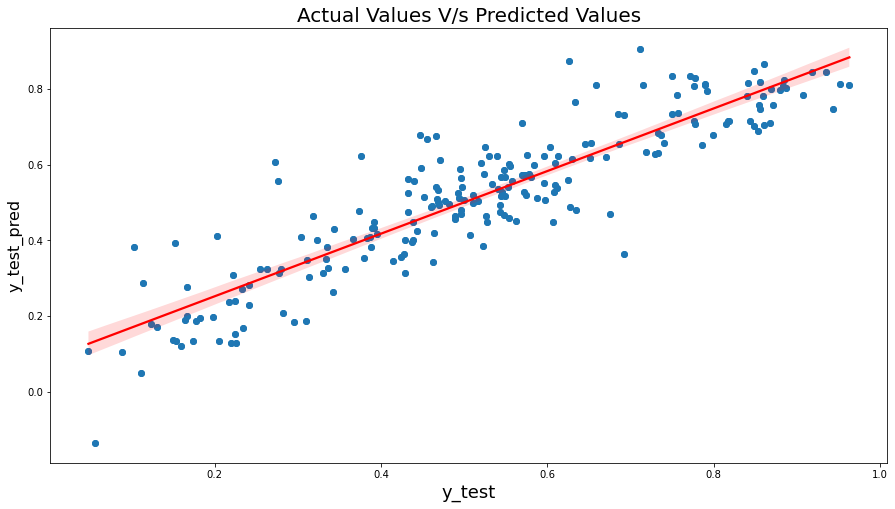

In [61]:
# Plotting the actual target values aginst the model predicted values for test data
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_pred)
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.title('Actual Values V/s Predicted Values', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_test_pred', fontsize=16)                          

plt.show()

### <span style = 'color : ForestGreen' >The plot clearly shows the linear relationship between Actual values and Predicted values

In [62]:
#Checking for other metrics
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE 0.07209205187858286
MSE 0.009136645151415436
RMSE 0.09558579994651631


### <span style = 'color : ForestGreen' > Values less than 0.5 for RMSE is good indicator that the ability of the model to predict the target variable value is very good. The RMSE value is 0.095

In [63]:
#Printing the coefficient values for easy understanding of the impactful features
print('Printing the coefficients based on magnitude')
Cofficients = abs(round(FinalModel.params,2))
Coeff_Vals = Cofficients.sort_values(ascending = False)
print(Coeff_Vals)

print('\n\nPrinting the coefficients with magnitude and sign')
Cofficients = round(FinalModel.params,2)
Coeff_Vals = Cofficients.sort_values(ascending = False)
print(Coeff_Vals)

Printing the coefficients based on magnitude
temperature    0.49
lightsnow      0.29
year           0.23
const          0.16
windspeed      0.15
winter         0.09
Sep            0.08
mist           0.08
spring         0.07
holiday        0.06
Saturday       0.06
workingday     0.05
summer         0.05
Jul            0.05
dtype: float64


Printing the coefficients with magnitude and sign
temperature    0.49
year           0.23
const          0.16
winter         0.09
Sep            0.08
Saturday       0.06
workingday     0.05
summer         0.05
Jul           -0.05
holiday       -0.06
spring        -0.07
mist          -0.08
windspeed     -0.15
lightsnow     -0.29
dtype: float64


In [64]:
#Formulating the LR Equation
for i in range(0, len(Coeff_Vals)):
    print('(',abs(float(Coeff_Vals[i])),'*',Coeff_Vals.index[i],')',end ='')
    if i<(len(Coeff_Vals)-1) and float(Coeff_Vals[i])>0:
        print(' + ',end ='')
    if i<(len(Coeff_Vals)-1) and float(Coeff_Vals[i])<0:
        print(' - ',end ='')

( 0.49 * temperature ) + ( 0.23 * year ) + ( 0.16 * const ) + ( 0.09 * winter ) + ( 0.08 * Sep ) + ( 0.06 * Saturday ) + ( 0.05 * workingday ) + ( 0.05 * summer ) + ( 0.05 * Jul ) - ( 0.06 * holiday ) - ( 0.07 * spring ) - ( 0.08 * mist ) - ( 0.15 * windspeed ) - ( 0.29 * lightsnow )

## <span style = 'color : SaddleBrown'> LR Equation 
### <span style = 'color : ForestGreen'> Count = <span style = 'color : DarkSlateBlue'> ( 0.49 * temperature ) + ( 0.23 * year ) + ( 0.16 * const ) + ( 0.09 * winter ) + ( 0.08 * Sep ) + ( 0.06 * Saturday ) + ( 0.05 * workingday ) + ( 0.05 * summer ) + ( 0.05 * Jul ) <span style = 'color : Red'>- ( 0.06 * holiday ) - ( 0.07 * spring ) - ( 0.08 * mist ) - ( 0.15 * windspeed ) - ( 0.29 * lightsnow )

## <span style = 'color : Navy' >Insights

> ### <span style = 'color : SteelBlue' > Temperature is the most positively contributing feature to the target variable. Summer season also has a positive relation. Hence, the company should make sure of the availability of bikes during these periods due to high demands
 
> ### <span style = 'color : SteelBlue' > Saturdays and Working days have a positive influence on the number of bookings. Also, holidays have a negative impact. Hence, the company should come up with some strategy to attract the users on Working weekdays as well as holidays.   

> ### <span style = 'color : SteelBlue' > Weather conditions like Mist, clouds, Light Snow, Light rain etc have a negative contribution. The spring season and windy condition also can be considered as an extension to this. As such, company should come up with better or complmentary strategies to tackle this issue.


> ### <span style = 'color : SteelBlue' > Though the entire winter is a good contributing factor, the September month alone stands out as more contributing factor. 

> ### <span style = 'color : SteelBlue' > There is an increase in bookings from 2018 to 2019, with an organic growth of 23%. 